In [8]:
import pandas as pd
import seaborn as sns

In [2]:
stroke_data = pd.read_csv("C:\\Users\\pooja\\Documents\\datasets\\StrokePrediction\\healthcare-dataset-stroke-data.csv")
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_data.dtypes
## In this data 
## categorical columns - gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
## float - avg_glucose_level,bmi
## int - age
## target - stroke 

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
cat_cols = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
stroke_data[cat_cols] = stroke_data[cat_cols].apply(lambda x : x.astype(object))

In [5]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [7]:
stroke_data.isnull().sum() ## bmi with missing value

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

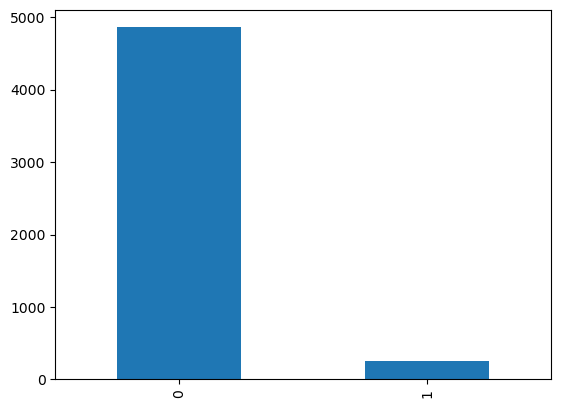

In [20]:
stroke_data['stroke'].value_counts().plot(kind='bar') ## highly imbalanced data, cases with stroke 4.8% 

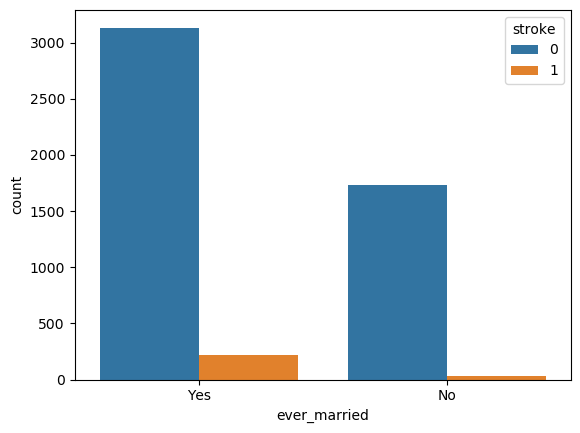

In [25]:
sns.countplot(x='ever_married',data = stroke_data,hue = 'stroke')

ever_married    No   Yes
stroke                  
0             1728  3133
1               29   220


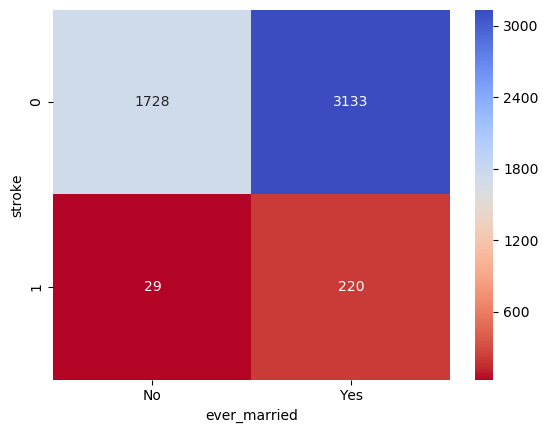

In [36]:
crosstab = pd.crosstab(stroke_data['stroke'], stroke_data['ever_married'])
print(crosstab)
# Plot the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm_r')

heart_disease     0    1
stroke                  
0              4632  229
1               202   47


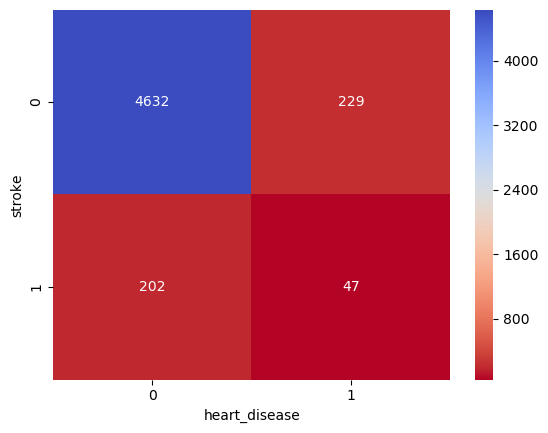

In [35]:
crosstab = pd.crosstab(stroke_data['stroke'], stroke_data['heart_disease'])
print(crosstab)
# Plot the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm_r')

hypertension      0    1
heart_disease           
0              4400  434
1               212   64


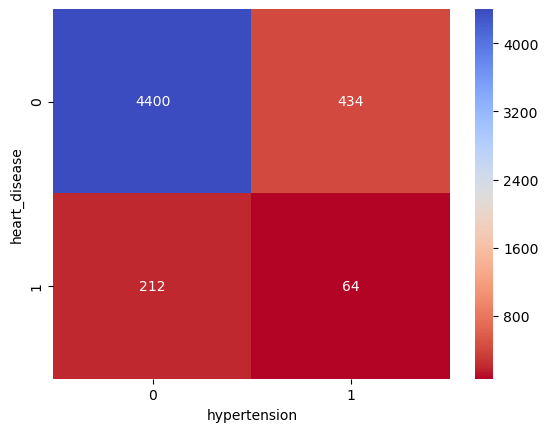

In [37]:
crosstab = pd.crosstab(stroke_data['heart_disease'], stroke_data['hypertension'])
print(crosstab)
# Plot the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm_r')

stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2


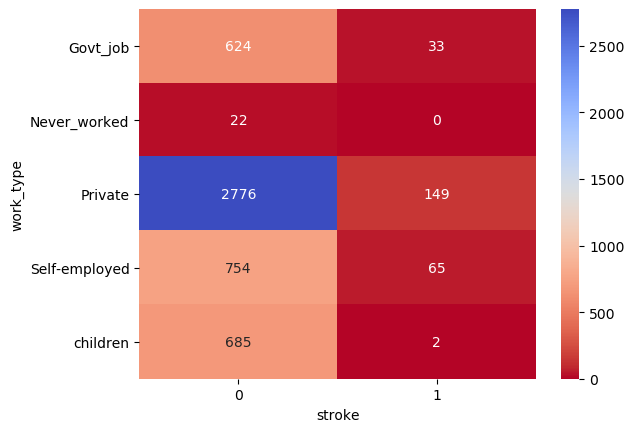

In [38]:
crosstab = pd.crosstab(stroke_data['work_type'], stroke_data['stroke'])
print(crosstab)
# Plot the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm_r')

stroke             0    1
Residence_type           
Rural           2400  114
Urban           2461  135


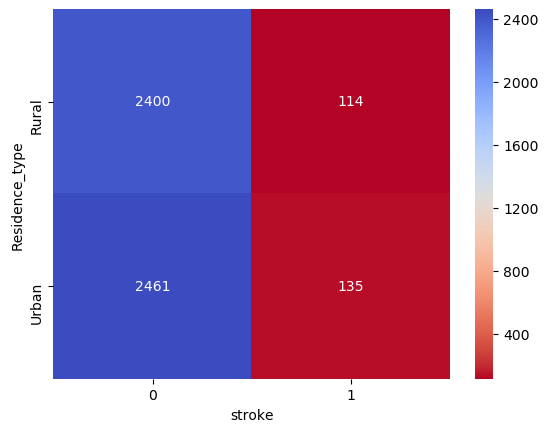

In [39]:
crosstab = pd.crosstab(stroke_data['Residence_type'], stroke_data['stroke'])
print(crosstab)
# Plot the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm_r')

stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42


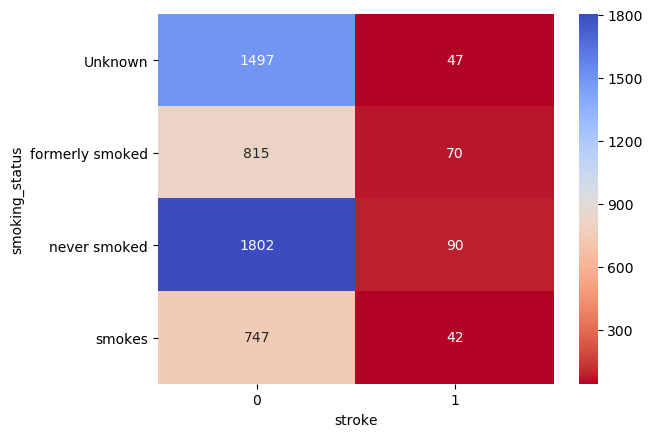

In [40]:
crosstab = pd.crosstab(stroke_data['smoking_status'], stroke_data['stroke'])
print(crosstab)
# Plot the heatmap
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm_r')

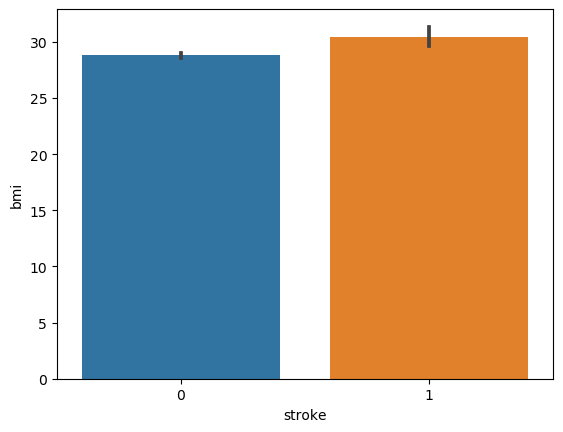

In [41]:
sns.barplot(stroke_data['stroke'],stroke_data['bmi'])

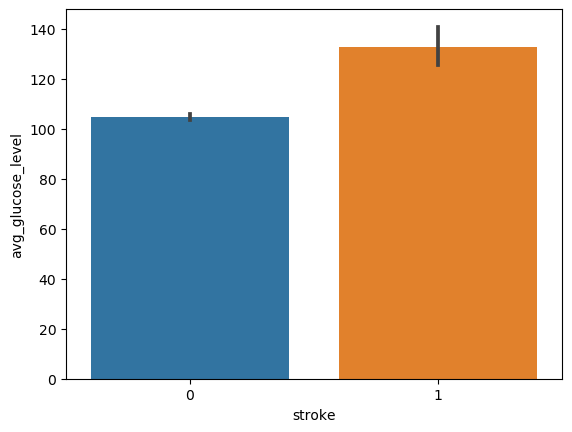

In [42]:
sns.barplot(stroke_data['stroke'],stroke_data['avg_glucose_level'])

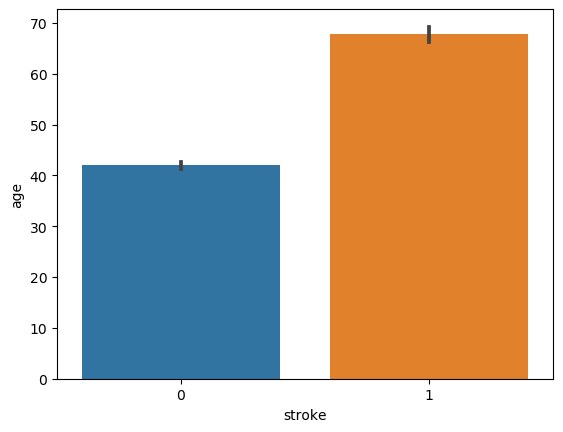

In [43]:
sns.barplot(stroke_data['stroke'],stroke_data['age'])

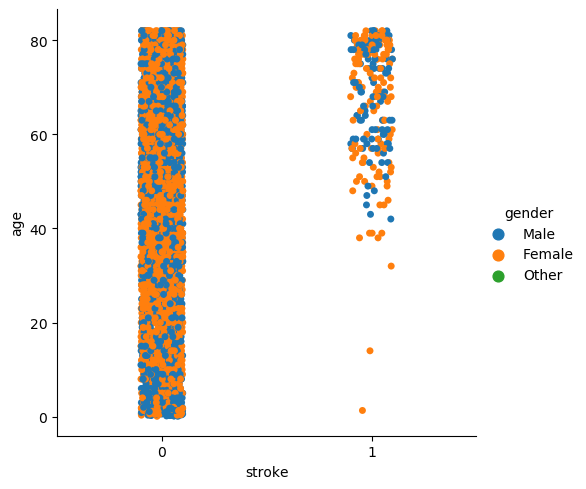

In [53]:
sns.catplot('stroke','age',data = stroke_data,hue='gender')